In [1]:
import pandas as pd 
from sys import path
path.append('..')
from solardatatools import standardize_time_axis, make_2d, plot_2d, load_pvo_data
import boto3
from solardataretrieval import utilities 
from solardataretrieval.retrieval import Retrieval
from functools import partial
from solardatatools.clear_day_detection import filter_for_sparsity
from solardatatools import find_clear_days


In [2]:
#set variables here: 
#choose how many sites you want in your data pipeline
number_of_sites = 20
number_of_days = 50
quantile_percent = 0.95
#set filter thresholds and time sample (if 5 min: day_samples = 288)
sparsity_th = 0.3
quality_th = 0.7
day_samples = 288

In [3]:
y = Retrieval()
#add your own daily filters
sparcity_filter = partial(filter_for_sparsity, solver='MOSEK')
y.add_daily_filter(sparcity_filter)
y.add_daily_filter(find_clear_days)
#add your own site filters
#by default the method inputs only the 288 daily time sample sites
y.add_site_filter(y.summary_df['overall_quality'] > quality_th, daily_time_sample=288)
#if the user wants to see the data before uploading, otherwise should run data_upload method only
df_data_input, df_meta_data = y.data_retrieval(number_of_sites, number_of_days, quantile_percent)
#y.data_upload(number_of_sites, number_of_days, quantile_percent)

In [4]:
k = Retrieval()
#use standard daily filter 
k.construct_standard_daily_filters() 
#use standard site filters
k.construct_standard_site_filters()
#if the user wants to see the data before uploading, otherwise should run data_upload method only
df_data_input, df_meta_data = k.data_retrieval(number_of_sites, number_of_days, quantile_percent)
#k.data_upload(number_of_sites, number_of_days, quantile_percent)

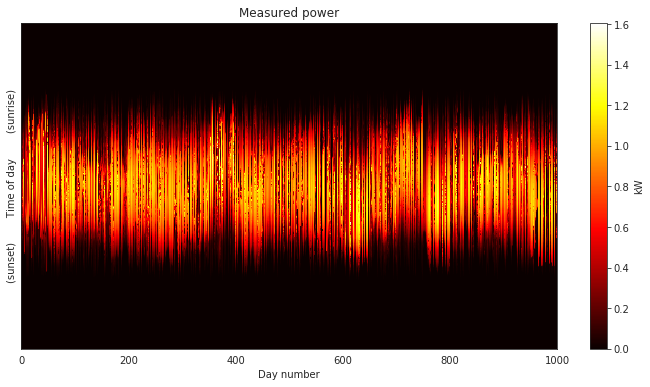

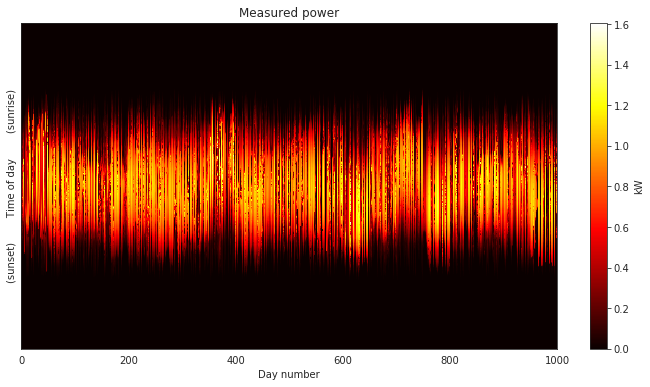

In [5]:
plot_2d(df_data_input)